In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../merged_data.csv')

In [4]:
df.head()

,Zipcode,State,City,Metro,CountyName,Year,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
0,1001,MA,Agawam,"Springfield, MA",Hampden County,2012,-2.451772,-2.096436,33.333333,0.0,200.000000,0.0,20.512821
1,1001,MA,Agawam,"Springfield, MA",Hampden County,2013,0.973817,-1.177730,-40.000000,0.0,50.000000,100.0,12.765957
2,1001,MA,Agawam,"Springfield, MA",Hampden County,2014,0.441570,0.108342,-8.333333,0.0,7.407407,0.0,11.320755
3,1001,MA,Agawam,"Springfield, MA",Hampden County,2015,1.026204,-0.649351,18.181818,0.0,27.586207,0.0,8.474576
4,1001,MA,Agawam,"Springfield, MA",Hampden County,2016,4.639393,-0.108932,15.384615,-100.0,8.108108,-50.0,17.187500


In [8]:
byCounty = df.drop(['Zipcode', 'State', 'City', 'Metro', 'Year'], axis=1)
byCounty.head()

,CountyName,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
0,Hampden County,-2.451772,-2.096436,33.333333,0.0,200.000000,0.0,20.512821
1,Hampden County,0.973817,-1.177730,-40.000000,0.0,50.000000,100.0,12.765957
2,Hampden County,0.441570,0.108342,-8.333333,0.0,7.407407,0.0,11.320755
3,Hampden County,1.026204,-0.649351,18.181818,0.0,27.586207,0.0,8.474576
4,Hampden County,4.639393,-0.108932,15.384615,-100.0,8.108108,-50.0,17.187500


In [10]:
byCounty['GrowthRate'].describe()

count    250126.000000
mean          8.033114
std          29.125929
min         -41.724381
25%           2.792479
50%           5.900148
75%          10.377649
max        1271.430934
Name: GrowthRate, dtype: float64

<Axes: >

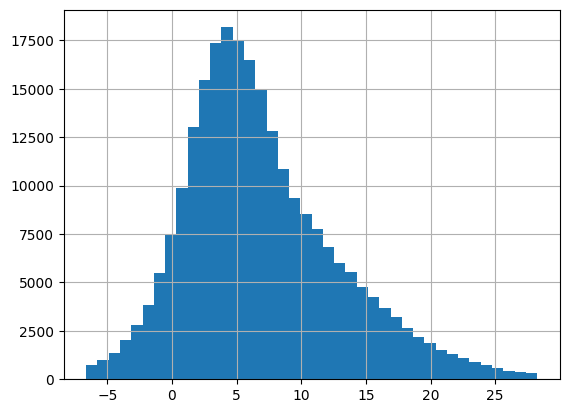

In [19]:
q1 = byCounty['GrowthRate'].quantile(0.01)
q25 = byCounty['GrowthRate'].quantile(0.25)
q75 = byCounty['GrowthRate'].quantile(0.75)
q99 = byCounty['GrowthRate'].quantile(0.99)
byCounty['GrowthRate'][byCounty['GrowthRate'].between(q1, q99)].hist(bins=40)

In [30]:
binaryDf = byCounty
lowThreshold = -1.0
highThreshold = 1.0

colsToBinarize = [col for col in binaryDf.columns if col not in ['CountyName']]

for col in colsToBinarize:
    binaryDf.loc[df[col] <= lowThreshold, col] = -1
    binaryDf.loc[(df[col] > lowThreshold) & (df[col] < highThreshold), col] = 0
    binaryDf.loc[df[col] >= highThreshold, col] = 1

binaryDf.head()

,CountyName,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
0,Hampden County,-1.0,-1.0,1.0,0.0,1.0,0.0,1.0
1,Hampden County,0.0,-1.0,-1.0,0.0,1.0,1.0,1.0
2,Hampden County,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
3,Hampden County,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,Hampden County,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0


array([[<Axes: title={'center': 'GrowthRate'}>,
        <Axes: title={'center': 'WHITE'}>,
        <Axes: title={'center': 'BLACK_OR_AFRICAN_AMERICAN'}>],
       [<Axes: title={'center': 'AMERICAN_INDIAN_AND_ALASKA_NATIVE'}>,
        <Axes: title={'center': 'ASIAN'}>,
        <Axes: title={'center': 'NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER'}>],
       [<Axes: title={'center': 'HISPANIC_OR_LATINO'}>, <Axes: >,
        <Axes: >]], dtype=object)

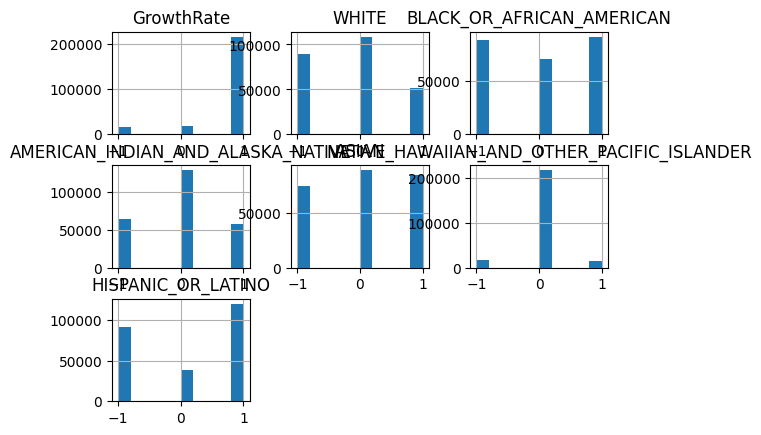

In [31]:
binaryDf.hist()

In [68]:
binaryGrouped = binaryDf.groupby('CountyName')
binaryGrouped.corr(numeric_only=True)

GrowthRate  \
CountyName                                                                
Abbeville County GrowthRate                                    1.000000   
                 WHITE                                        -0.162654   
                 BLACK_OR_AFRICAN_AMERICAN                    -0.054591   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE            -0.015295   
                 ASIAN                                         0.061583   
...                                                                 ...   
Zavala County    BLACK_OR_AFRICAN_AMERICAN                     0.233380   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE             0.134535   
                 ASIAN                                        -0.320844   
                 NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER         NaN   
                 HISPANIC_OR_LATINO                           -0.283866   

                                                                WHITE  \
CountyName                                                              
Abbeville County GrowthRate                                 -0.162654   
                 WHITE                                       1.000000   
                 BLACK_OR_AFRICAN_AMERICAN                  -0.806211   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE          -0.082747   
                 ASIAN                                      -0.163357   
...                                                               ...   
Zavala County    BLACK_OR_AFRICAN_AMERICAN                  -0.271696   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE           0.069098   
                 ASIAN                                      -0.439435   
                 NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER       NaN   
                 HISPANIC_OR_LATINO                          0.126357   

                                                             BLACK_OR_AFRICAN_AMERICAN  \
CountyName                                                                               
Abbeville County GrowthRate                                                  -0.054591   
                 WHITE                                                       -0.806211   
                 BLACK_OR_AFRICAN_AMERICAN                                    1.000000   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE                           -0.077044   
                 ASIAN                                                       -0.038956   
...                                                                                ...   
Zavala County    BLACK_OR_AFRICAN_AMERICAN                                    1.000000   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE                            0.240192   
                 ASIAN                                                        0.000000   
                 NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER                        NaN   
                 HISPANIC_OR_LATINO                                          -0.427967   

                                                             AMERICAN_INDIAN_AND_ALASKA_NATIVE  \
CountyName                                                                                       
Abbeville County GrowthRate                                                          -0.015295   
                 WHITE                                                               -0.082747   
                 BLACK_OR_AFRICAN_AMERICAN                                           -0.077044   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE                                    1.000000   
                 ASIAN                                                                0.349268   
...                                                                                        ...   
Zavala County    BLACK_OR_AFRICAN_AMERICAN                                            0.240192   
                 AMERICAN_INDIAN_AND_ALASKA_NATIVE                                

In [73]:
toOutput = binaryDf.drop(['CountyName'], axis=1)
toOutput.to_csv('binary_dataset.csv', index=False)